In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from googlefinance.client import get_price_data
%matplotlib inline

<h3> Read Data</h3><br>

In [16]:
param_GE = {'q': "GE",'x': "NYSE","p" : "1Y",'i': "86400"}
param_F = {'q': "F",'x': "NYSE","p" : "1Y",'i': "86400"}

In [17]:
df_F = get_price_data(param_F)

In [18]:
df_GE = get_price_data(param_GE)

In [19]:
df_GE.head()

,Open,High,Low,Close,Volume
2017-04-24 22:00:00,29.85,29.93,29.49,29.55,48585162
2017-04-25 22:00:00,29.45,29.60,29.32,29.45,39854055
2017-04-26 22:00:00,29.52,29.55,29.26,29.26,37368373
2017-04-27 22:00:00,29.29,29.31,29.02,29.08,32939845
2017-04-28 22:00:00,29.10,29.16,28.93,28.99,24079191


Always inspect the data

In [20]:
df_GE.head()

,Open,High,Low,Close,Volume
2017-04-24 22:00:00,29.85,29.93,29.49,29.55,48585162
2017-04-25 22:00:00,29.45,29.60,29.32,29.45,39854055
2017-04-26 22:00:00,29.52,29.55,29.26,29.26,37368373
2017-04-27 22:00:00,29.29,29.31,29.02,29.08,32939845
2017-04-28 22:00:00,29.10,29.16,28.93,28.99,24079191


In [21]:
df_GE.tail()

,Open,High,Low,Close,Volume
2018-04-16 22:00:00,13.50,13.58,13.23,13.33,58279028
2018-04-17 22:00:00,13.38,13.87,13.36,13.79,72129064
2018-04-18 22:00:00,13.88,13.92,13.62,13.66,42983544
2018-04-19 22:00:00,13.67,14.06,13.63,13.99,87782256
2018-04-20 22:00:00,14.94,15.05,14.34,14.54,188686041


<h3>Add A Column </h3><br>
Containing difference between open en closing price

In [22]:
df_GE['Range']=df_GE['Open']-df_GE['Close']
df_GE.head()

,Open,High,Low,Close,Volume,Range
2017-04-24 22:00:00,29.85,29.93,29.49,29.55,48585162,0.30
2017-04-25 22:00:00,29.45,29.60,29.32,29.45,39854055,0.00
2017-04-26 22:00:00,29.52,29.55,29.26,29.26,37368373,0.26
2017-04-27 22:00:00,29.29,29.31,29.02,29.08,32939845,0.21
2017-04-28 22:00:00,29.10,29.16,28.93,28.99,24079191,0.11


Calculate absolute value of the difference

In [23]:
df_GE['AbsRange'] = df_GE['Range'].apply(lambda x: np.abs(x))
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-04-24 22:00:00,29.85,29.93,29.49,29.55,48585162,0.30,0.30
2017-04-25 22:00:00,29.45,29.60,29.32,29.45,39854055,0.00,0.00
2017-04-26 22:00:00,29.52,29.55,29.26,29.26,37368373,0.26,0.26
2017-04-27 22:00:00,29.29,29.31,29.02,29.08,32939845,0.21,0.21
2017-04-28 22:00:00,29.10,29.16,28.93,28.99,24079191,0.11,0.11


<h3>Sorting the results</h3>

In [24]:
df_GE.sort_values(by='AbsRange',inplace=True,ascending=False)
df_GE.head()

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.69,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.84,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.75,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.44,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.88,17.4600,17.90,312556809,0.89,0.89


<h3> Boolean Indexing </h3>
Find the dates where the difference is > 60 Cents

In [25]:
idx = df_GE['AbsRange']>0.6
df_GE.loc[idx,:]

,Open,High,Low,Close,Volume,Range,AbsRange
2017-07-31 22:00:00,0.00,25.690,0.0000,25.61,30616287,-25.61,25.61
2017-10-20 22:00:00,22.14,23.840,22.1000,23.83,192404370,-1.69,1.69
2017-11-13 22:00:00,20.26,20.750,18.7501,19.02,261557413,1.24,1.24
2017-10-23 22:00:00,23.44,23.440,22.1800,22.32,187340912,1.12,1.12
2017-11-14 22:00:00,18.79,18.880,17.4600,17.90,312556809,0.89,0.89
2017-11-15 22:00:00,17.51,18.380,17.5000,18.26,144368004,-0.75,0.75
2018-02-08 22:00:00,15.19,15.205,14.4500,14.45,138636134,0.74,0.74
2017-10-09 22:00:00,24.10,24.150,23.2500,23.43,140302771,0.67,0.67
2017-06-13 22:00:00,29.12,29.160,28.3400,28.45,58823660,0.67,0.67
2017-09-27 22:00:00,25.00,25.050,24.2800,24.37,56322448,0.63,0.63


<h3>Comparing with Ford<h3>

In [26]:
df = pd.concat([df_GE['Close'],df_F['Close']],axis=1)
df.columns = ['GE','F']
df.head()

,GE,F
2017-04-24 22:00:00,29.55,11.43
2017-04-25 22:00:00,29.45,11.48
2017-04-26 22:00:00,29.26,11.60
2017-04-27 22:00:00,29.08,11.47
2017-04-28 22:00:00,28.99,11.47


Calculate the difference between the return of GE and F

In [27]:
df_ret = df.pct_change(periods=1)
df_ret['Diff']= df_ret['GE']-df_ret['F']
df_ret['Diff']=df_ret['Diff'].apply(lambda x : np.abs(x))
df_ret.head()

,GE,F,Diff
2017-04-24 22:00:00,NaN,NaN,NaN
2017-04-25 22:00:00,-0.003384,0.004374,0.007759
2017-04-26 22:00:00,-0.006452,0.010453,0.016905
2017-04-27 22:00:00,-0.006152,-0.011207,0.005055
2017-04-28 22:00:00,-0.003095,0.000000,0.003095


<h3>Graph</h3>

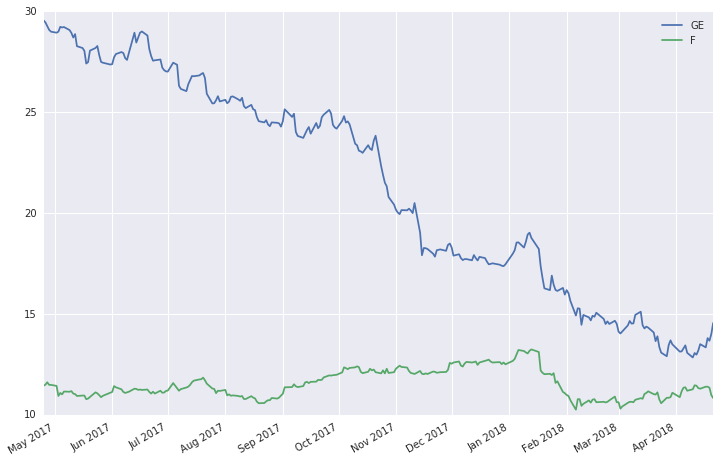

In [30]:
df.plot(figsize=(12,8));